In [45]:
import tkinter as tk
import numpy as np # thư viện tính toán toán học
import seaborn as sns
import matplotlib.pyplot as plt # visualize data sử dụng đồ thị
sns.set(color_codes = True)
from scipy.spatial.distance import cdist # Hỗ trợ tính khoảng cách
import pandas as pd 
import math as m 
import csv
import random
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import MinMaxScaler


num_cluster = 5

In [46]:
df=pd.read_csv("C:\\Users\\LENOVO\Downloads\\StudentsPerformance.csv", index_col=0)

In [47]:
df

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,,,,,,,
female,group B,bachelor's degree,standard,none,72,72,74
female,group C,some college,standard,completed,69,90,88
female,group B,master's degree,standard,none,90,95,93
male,group A,associate's degree,free/reduced,none,47,57,44
male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...
female,group E,master's degree,standard,completed,88,99,95
male,group C,high school,free/reduced,none,62,55,55
female,group C,high school,free/reduced,completed,59,71,65


In [48]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, female to female
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   race/ethnicity               1000 non-null   object
 1   parental level of education  1000 non-null   object
 2   lunch                        1000 non-null   object
 3   test preparation course      1000 non-null   object
 4   math score                   1000 non-null   int64 
 5   reading score                1000 non-null   int64 
 6   writing score                1000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 62.5+ KB


In [49]:
df.isnull().sum()

race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [51]:
df_ = df.to_numpy()
df_ = np.delete(df_, 3, 1)
df_ = np.delete(df_, 2, 1)
df_ = np.delete(df_, 1, 1)
df_ = np.delete(df_, 0, 1)
df_

array([[72, 72, 74],
       [69, 90, 88],
       [90, 95, 93],
       ...,
       [59, 71, 65],
       [68, 78, 77],
       [77, 86, 86]], dtype=object)

In [52]:
def plot_data(data_set, labels, number_of_cluster, centers, i=0, j=2):
    color_list = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#17becf", "#e377c2", "#bcbd22", "#7f7f7f"]
    x_points = [[] for x in range(number_of_cluster)]
    y_points = [[] for x in range(number_of_cluster)]
    x_centers = []
    y_centers = []

    for x in range(number_of_cluster):
        x_centers.append(centers[x][i])
        y_centers.append(centers[x][j])

    for index in range(len(data_set)):
        x_points[labels[index]].append(data_set[index][i])
        y_points[labels[index]].append(data_set[index][j])

    for x in range(number_of_cluster):
        plt.plot(x_points[x], y_points[x], '.', color=color_list[x])

    plt.plot(x_centers, y_centers, '.', color="black")
    plt.show()

In [ ]:
# Calculate Z-scores for each attribute
z_scores = np.abs((X - X.mean()) / X.std())

# Define a threshold for outlier detection 
threshold = 3

# Create a mask to identify outliers
outlier_mask = z_scores > threshold

# Remove outliers from the dataset
data_cleaned = X[~outlier_mask.any(axis=1)]

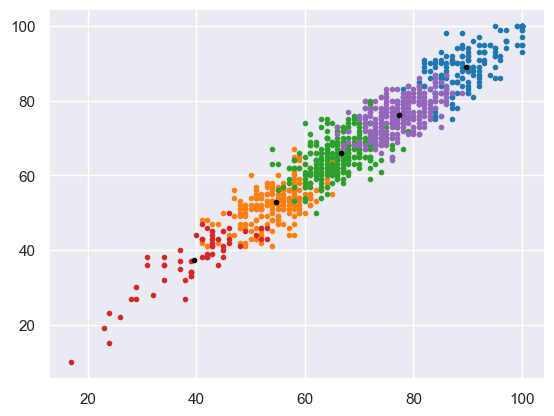

In [56]:
kmeans=KMeans(n_clusters=num_cluster)
kmeans.fit(df_)
plot_data(df_, kmeans.labels_, num_cluster, kmeans.cluster_centers_, 1, 2)